In [5]:
from IPython.display import Image

url = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png"
Image(url=url)

Load the Iris dataset into a pandas DataFrame



In [32]:
import pandas as pd

#Load the Iris dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()

#Convert to a pandas DataFrame
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)

#Add target column to the DataFrame
df['species'] = iris.target_names[iris.target]

df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

Find the mean and median of the 'sepal_length' column.

In [33]:
#Find mean and median of 'sepal_length' column
mean_sepal_length = df['sepal length (cm)'].mean()
median_sepal_length = df['sepal length (cm)'].median()

print(f"Mean of 'sepal_length'column:{mean_sepal_length}")
print(f"Median of 'sepal_length'column:{median_sepal_length}")

Mean of 'sepal_length'column:5.843333333333334
Median of 'sepal_length'column:5.8


Calculate the 75th percentile of the 'petal_width' column for each species in the Iris dataset.

In [34]:
# Calculate 75th percentile of 'petal_width' column for each species
percentile_75th = df.groupby('species')['petal width (cm)'].quantile(0.75)

print("75th percentile of 'petal_width' column for each species:")
print(percentile_75th)

75th percentile of 'petal_width' column for each species:
species
setosa        0.3
versicolor    1.5
virginica     2.3
Name: petal width (cm), dtype: float64


Create a new column in the Iris DataFrame called 'sepal_area', which is the product of 'sepal_length' and 'sepal_width'.

In [35]:
#Create 'sepal_area' column
df['sepal_area'] = df['sepal length (cm)']*df['sepal width (cm)']

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  sepal_area  
0  setosa       17.85  
1  setosa       14.70  
2  setosa       15.04  
3  setosa       14.26  
4  setosa       18.00  


Remove all rows in the Iris DataFrame where 'petal_length' is greater than twice the standard deviation of 'petal_length' for that species.

In [36]:
# Calculate standard deviation of 'petal_length' for each species
std_dev_by_species = df.groupby('species')['petal length (cm)'].std()

# Function to filter rows based on criteria
def filter_rows(row):
    species = row['species']
    std_dev = std_dev_by_species[species]
    return row['petal length (cm)'] <= 2 * std_dev

# Apply filter function to DataFrame
df_filtered = df[df.apply(filter_rows, axis=1)]

# Display the filtered DataFrame
print(df_filtered.head())

Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), species, sepal_area]
Index: []


In [37]:
std_dev_by_species

species
setosa        0.173664
versicolor    0.469911
virginica     0.551895
Name: petal length (cm), dtype: float64

Normalize all numerical columns in the Iris DataFrame (except the 'species' column) using Min-Max scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler
# Extract numerical columns for scaling
numerical_columns = df.columns[df.columns != 'species']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the normalized DataFrame
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

  species  sepal_area  
0  setosa    0.392108  
1  setosa    0.234765  
2  setosa    0.251748  
3  setosa    0.212787  
4  setosa    0.399600  


Find the three most common combinations of 'sepal_length', 'sepal_width', and 'petal_length' in the Iris dataset.

In [39]:

# Find the three most common combinations of 'sepal_length', 'sepal_width', and 'petal_length'
top_combinations = df.groupby(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']).size().nlargest(3)

print("Three most common combinations of 'sepal_length', 'sepal_width', and 'petal_length':")
print(top_combinations)

Three most common combinations of 'sepal_length', 'sepal_width', and 'petal_length':
sepal length (cm)  sepal width (cm)  petal length (cm)
0.138889           0.416667          0.067797             2
0.166667           0.458333          0.084746             2
0.222222           0.625000          0.067797             2
dtype: int64


Group the Iris DataFrame by 'species' and find the row with the highest 'sepal_width' for each group.

In [40]:
#Add 'species' column to the DataFrame
df['species'] = iris.target_names[iris.target]

#Group by 'species' and find row with highest 'sepal_width' for each group
idx_max_sepal_width = df.groupby('species')['sepal width (cm)'].idxmax()

#Extract the rows with highest 'sepal_width' for each group
rows_highest_sepal_width = df.loc[idx_max_sepal_width]

print("Rows with highest 'sepal_width' for each species:")
print(rows_highest_sepal_width)

Rows with highest 'sepal_width' for each species:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15            0.388889          1.000000           0.084746             0.125   
85            0.472222          0.583333           0.593220             0.625   
117           0.944444          0.750000           0.966102             0.875   

        species  sepal_area  
15       setosa    0.753247  
85   versicolor    0.519481  
117   virginica    0.962038  


Replace all negative values in the 'petal_width' column of the Iris DataFrame with the mean of the non-negative values in that column.

In [41]:
# Replace negative values in 'petal_width' with the mean of non-negative values
petal_width = df['petal width (cm)']
mean_petal_width = petal_width[petal_width >= 0].mean()
df['petal width (cm)'] = petal_width.apply(lambda x: mean_petal_width if x < 0 else x)

# Display the updated DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

  species  sepal_area  
0  setosa    0.392108  
1  setosa    0.234765  
2  setosa    0.251748  
3  setosa    0.212787  
4  setosa    0.399600  


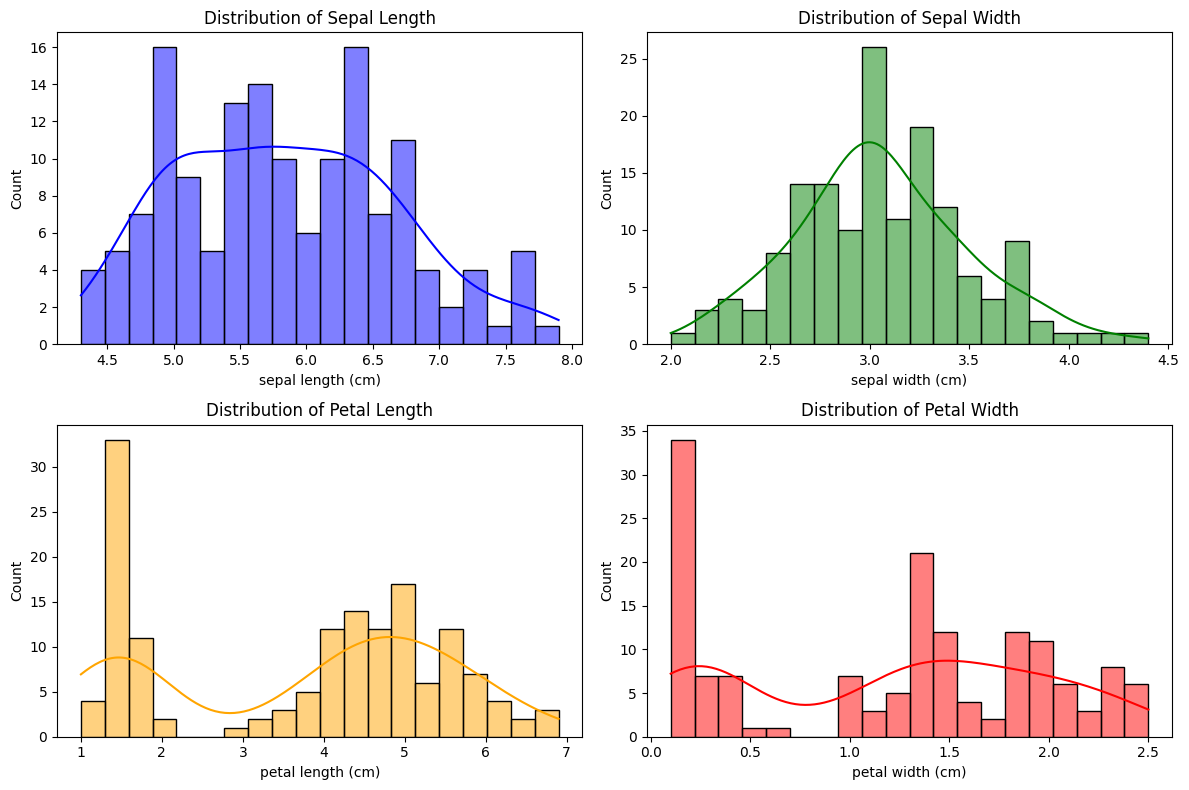

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset from sklearn
iris = load_iris()

# Convert to a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add 'species' column to the DataFrame
df['species'] = iris.target_names[iris.target]

# Plot histograms for each numerical feature
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['sepal length (cm)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sepal Length')

plt.subplot(2, 2, 2)
sns.histplot(df['sepal width (cm)'], bins=20, kde=True, color='green')
plt.title('Distribution of Sepal Width')

plt.subplot(2, 2, 3)
sns.histplot(df['petal length (cm)'], bins=20, kde=True, color='orange')
plt.title('Distribution of Petal Length')

plt.subplot(2, 2, 4)
sns.histplot(df['petal width (cm)'], bins=20, kde=True, color='red')
plt.title('Distribution of Petal Width')

plt.tight_layout()
plt.show()


 Boxplots for each numerical feature grouped by species

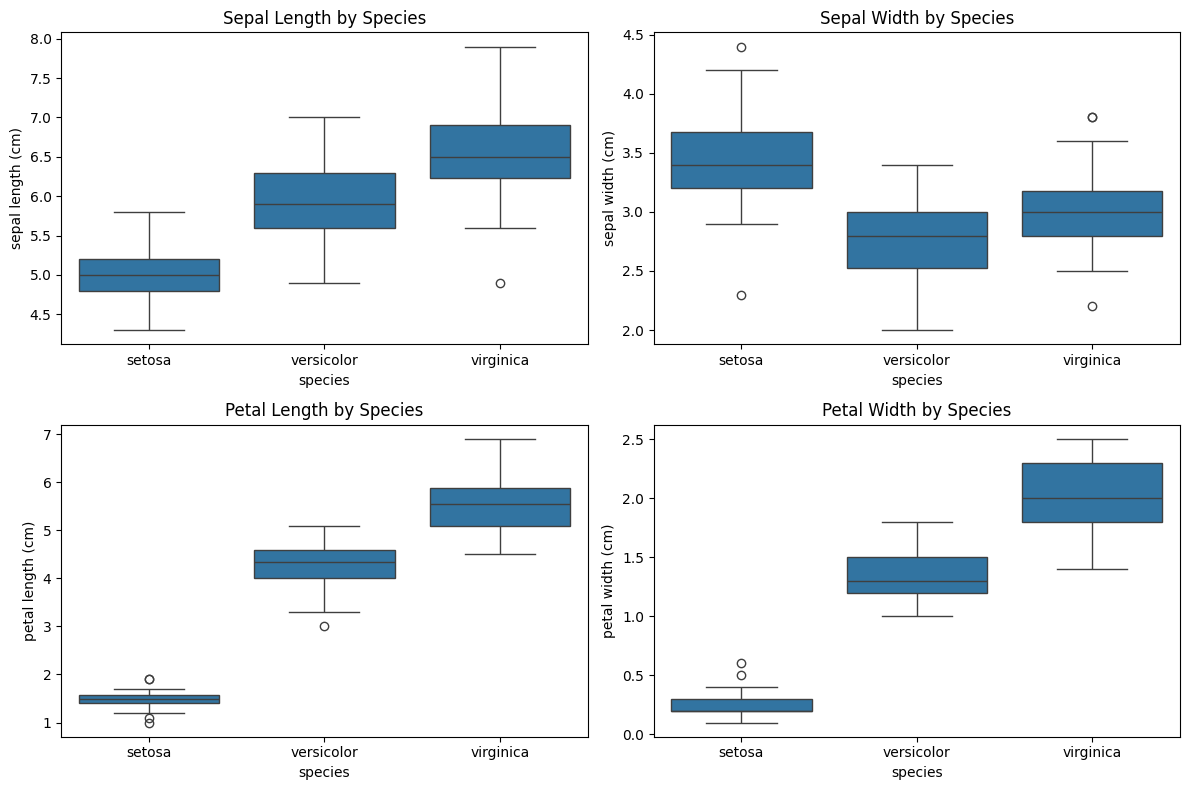

In [43]:
# Plot boxplots for each numerical feature grouped by species
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Sepal Length by Species')

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal width (cm)', data=df)
plt.title('Sepal Width by Species')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Petal Length by Species')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()


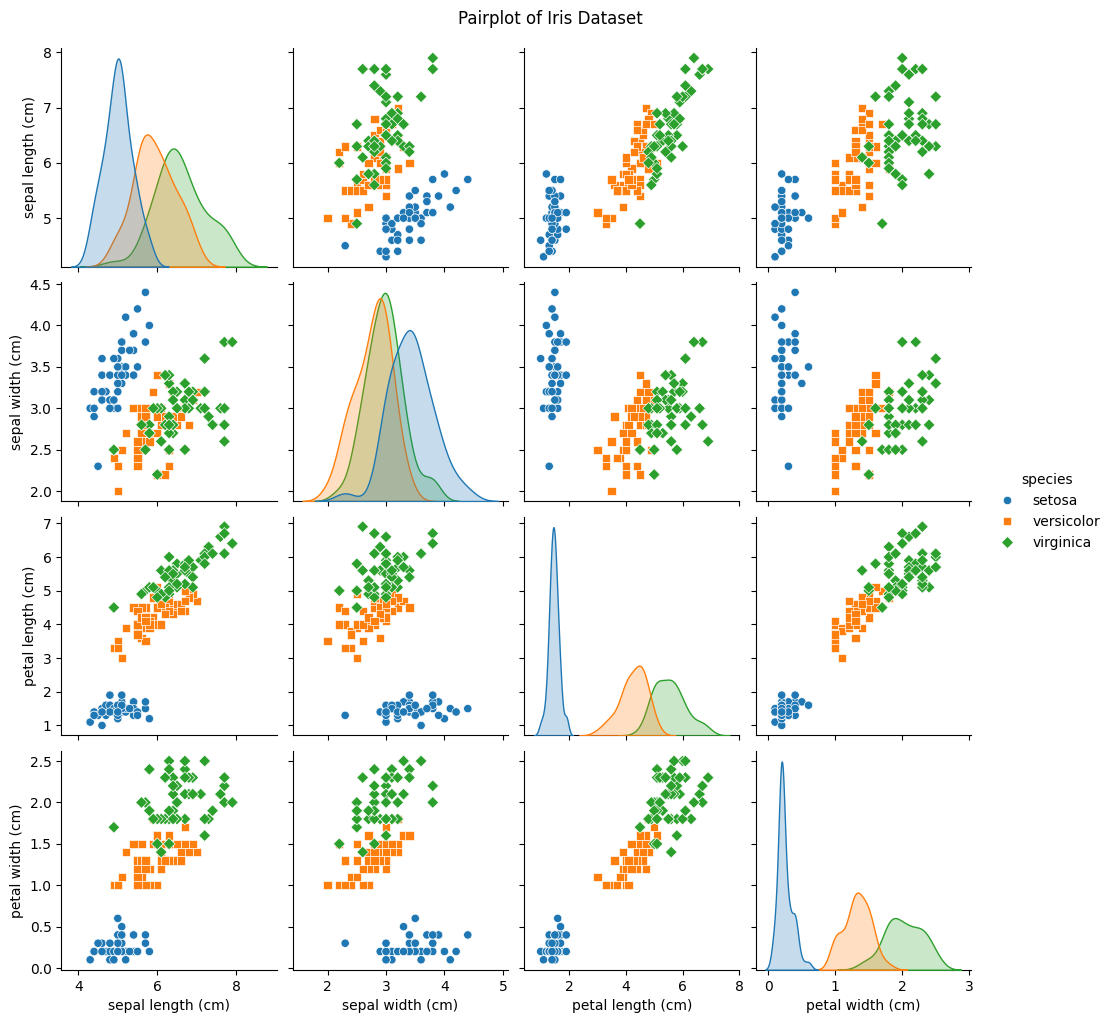

In [44]:
# Plot pairplot to visualize pairwise relationships
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()


 Calculate the correlation matrix for the 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' columns in the Iris dataset and find the feature with the highest absolute correlation with 'petal_width'.


In [45]:
#Calculate correlation matrix
corr_matrix = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Find the feature with the highest absolute correlation with 'petal_width'
highest_corr_feature = corr_matrix['petal width (cm)'].abs().idxmax()
print(f"Feature with highest absolute correlation with 'petal_width': {highest_corr_feature}")

Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  
Feature with highest absolute correlation with 'petal_width': petal width (cm)


**Visulaisation** **of** **correltion** **matrix**:

To visualize the correlation matrix for the 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' columns in the Iris dataset, you can use a heatmap plot, which provides an intuitive way to see the strength and direction of correlations between variables. Here's how you can create a correlation matrix heatmap using matplotlib and seaborn

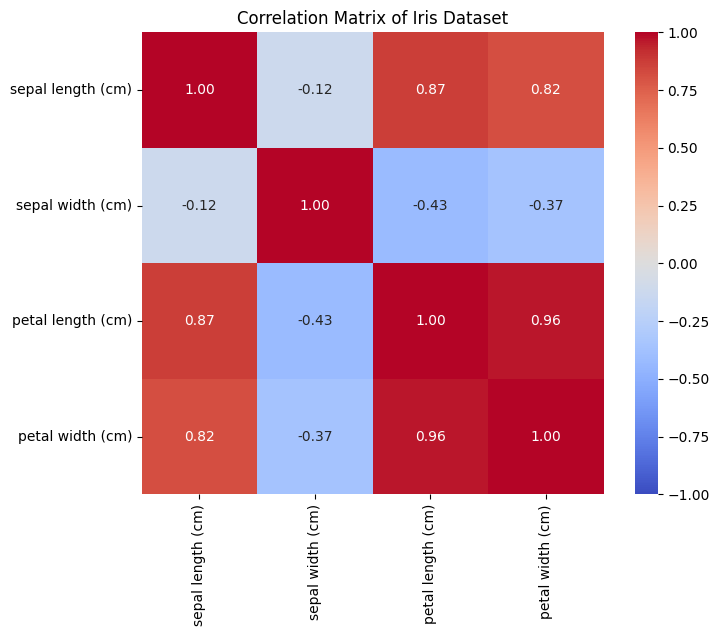

In [46]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset from sklearn
iris = load_iris()

# Convert to a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Calculate correlation matrix
corr_matrix = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Matrix of Iris Dataset')
plt.show()


** **Scatter** **plot** **relationships** : **

To visualize the relationships between pairs of variables ('sepal_length', 'sepal_width', 'petal_length', 'petal_width') in the Iris dataset, scatter plots are a great tool. Scatter plots allow us to examine how two variables vary together, providing insights into their correlation and potential patterns. Here's how you can create scatter plots for these relationships using seaborn:

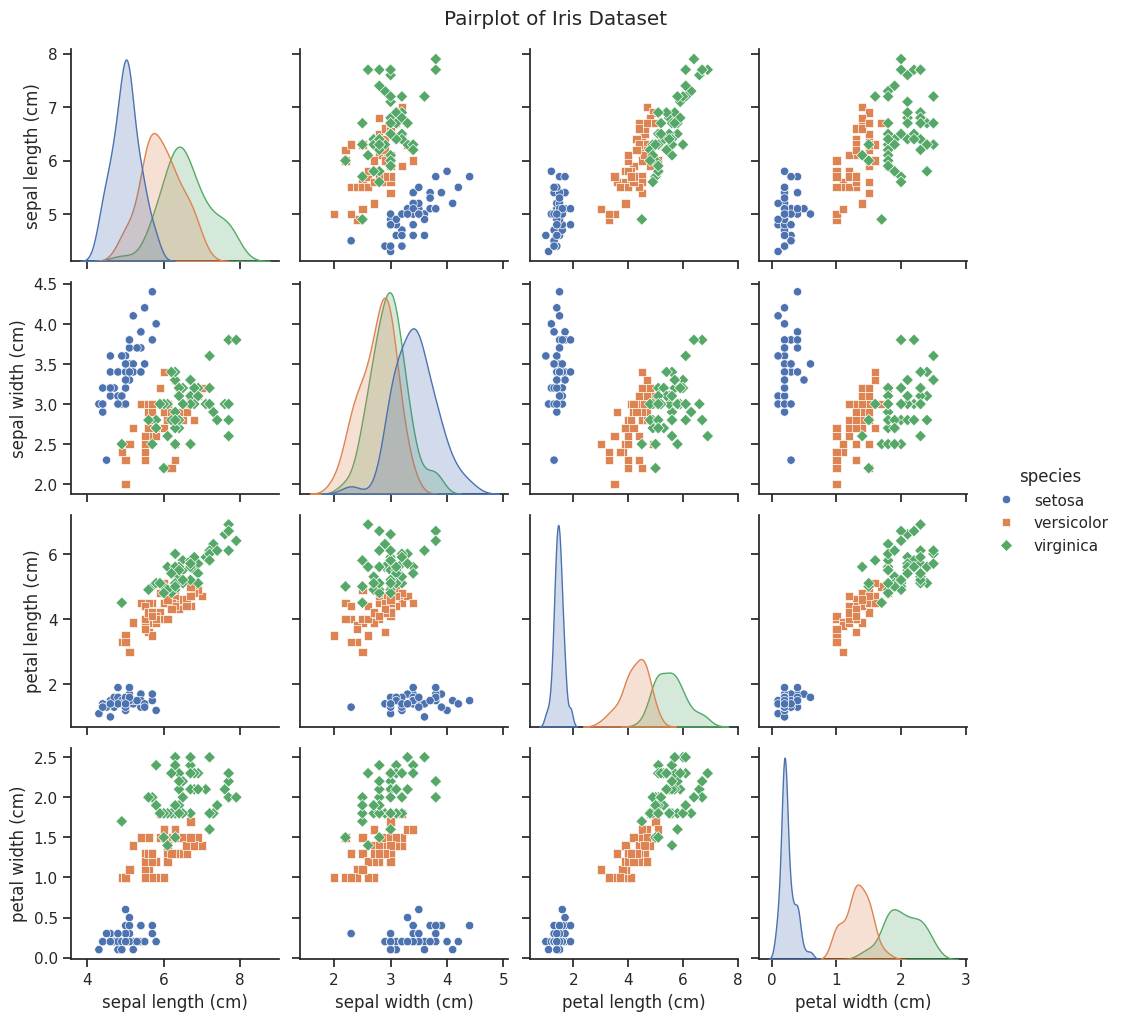

In [47]:
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset from sklearn
iris = load_iris()

# Convert to a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add 'species' column to the DataFrame
df['species'] = iris.target_names[iris.target]

# Scatter plot matrix
sns.set(style="ticks")
sns.pairplot(df, vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()


1. Statistical Summary:

Descriptive Statistics: Compute summary statistics such as mean, median, standard deviation, min, max, etc., for each numerical feature (sepal_length, sepal_width, petal_length, petal_width) to gain insights into central tendencies and variability.

In [48]:
# Example: Calculate descriptive statistics
summary_stats = df.describe()
print(summary_stats)


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


**Hypothesis Testing:**
Statistical Tests: Conduct hypothesis tests (e.g., t-tests, ANOVA) to determine if there are significant differences in feature distributions between different species.

In [49]:
# Example: Conduct t-test between two species for 'petal_length'
from scipy.stats import ttest_ind

species1_data = df[df['species'] == 'species1']['petal length (cm)']
species2_data = df[df['species'] == 'species2']['petal length (cm)']

t_stat, p_value = ttest_ind(species1_data, species2_data)
print(f"T-test between species1 and species2 for 'petal_length': T-statistic = {t_stat}, p-value = {p_value}")


T-test between species1 and species2 for 'petal_length': T-statistic = nan, p-value = nan


**Machine Learning Models:**

Model Building: Train and evaluate machine learning models to predict the 'species' based on the features ('sepal_length', 'sepal_width', 'petal_length', 'petal_width').

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Example: Train a logistic regression model
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 **Feature Importance:**

Feature Selection: Use feature importance techniques (e.g., from tree-based models) to identify which features contribute the most to predicting the target variable ('species').

In [51]:
# Example: Calculate feature importance using a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

feature_importance = tree_model.feature_importances_
print("Feature Importance:", feature_importance)


Feature Importance: [0.01667014 0.01667014 0.88947325 0.07718647]


 **Cross-validation and Model Evaluation:**

Cross-validation: Perform cross-validation to assess model performance and ensure it generalizes well to unseen data.


In [52]:
from sklearn.model_selection import cross_val_score

# Example: Cross-validation with logistic regression model
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean cross-validation score: 0.9733333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Visualization Enhancements:**

Advanced Plots: Use advanced visualization techniques such as interactive plots (e.g., Plotly, Bokeh) or dimensionality reduction techniques (e.g., PCA) to explore high-dimensional data.

In [53]:
# Example: Interactive scatter plot using Plotly
import plotly.express as px

fig = px.scatter(df, x='petal length (cm)', y='petal width (cm)', color='species', size='sepal length (cm)', hover_data=['sepal width (cm)'])
fig.update_layout(title='Interactive Scatter Plot of Iris Dataset')
fig.show()
